In [1]:
import numpy as np
import math

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
val_lacc_x = np.loadtxt("../Data/Raw/validation/Bag/LAcc_x.txt")
val_lacc_x.shape

(28789, 500)

In [7]:
val_lacc_x = val_lacc_x.flatten()
val_lacc_x.shape

(14394500,)

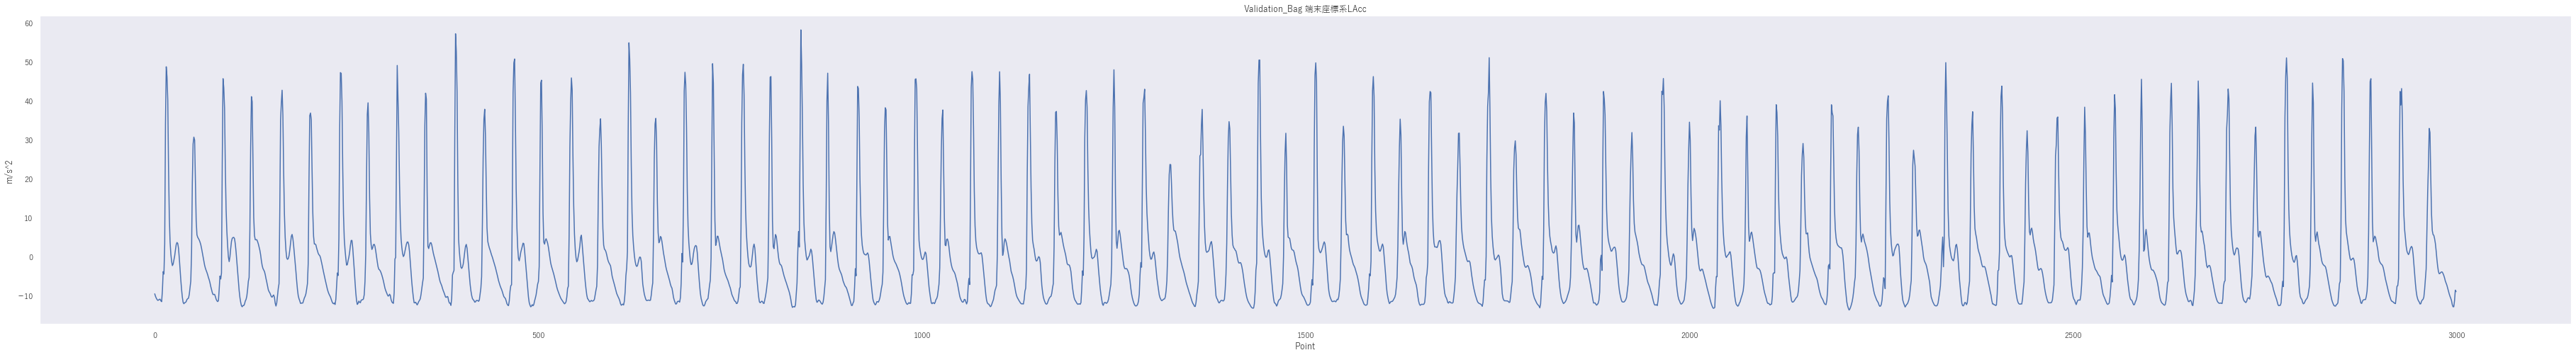

In [39]:
plt.figure(figsize=(64, 8))
plt.plot(val_lacc_x[7000:10000])
plt.title("Validation_Bag 端末座標系LAcc")
plt.xlabel("Point")
plt.ylabel("m/s^2")
plt.grid(False)
plt.show()

# TrainデータのNGラベル除いてnpyファイル化する

In [9]:
label = np.loadtxt("../Data/Raw/train/Bag/Label.txt")
label.shape

(196072, 500)

In [10]:
from tqdm import tqdm
NGindex = []
for i in tqdm(range(label.shape[0])):
    if np.unique(label[i]).size > 1:
        NGindex.append(i)

100%|██████████████████████████████████████████████████████████████████████| 196072/196072 [00:01<00:00, 113829.53it/s]


In [11]:
def ReturnUnique(x):
    return np.delete(x, NGindex, 0)

In [12]:
def loadtxt(hold_position, sensor, version):
    file_path = "../Data/Raw/train/" + hold_position + "/Glo_" + sensor + "_"
    x = np.loadtxt(file_path + "x_ver" + version + ".txt")
    y = np.loadtxt(file_path + "y_ver" + version + ".txt")
    z = np.loadtxt(file_path + "z_ver" + version + ".txt")
    x = ReturnUnique(x).reshape([-1, 500, 1])
    y = ReturnUnique(y).reshape([-1, 500, 1])
    z = ReturnUnique(z).reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_" + sensor + "_ver" + version, result)

In [13]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
sensors = ["Mag"]
versions = ["2", "3"]
for sensor in tqdm(sensors):
    for version in tqdm(versions):
        for hold_position in tqdm(hold_positions):
            loadtxt(hold_position, sensor, version)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|████████████████████▊                                                              | 1/4 [04:15<12:45, 255.31s/it]

 50%|█████████████████████████████████████████▌                                         | 2/4 [08:32<08:31, 255.92s/it]

 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [12:49<04:16, 256.31s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [17:08<00:00, 257.03s/it]

 50%|█████████████████████████████████████████                                         | 1/2 [17:08<17:08, 1028.13s/it]

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|████████████████████▊      

In [ ]:
a = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Glo_LAcc_ver2.npy")
a.shape

# Validationデータもやる
## なんとvalidationデータも5秒間同じラベルが続かないセグメントが100程度あった！！！

In [14]:
label = np.loadtxt("../Data/Raw/validation/Bag/Label.txt")
label.shape

(28789, 500)

In [15]:
from tqdm import tqdm
NGindex = []
for i in tqdm(range(label.shape[0])):
    if np.unique(label[i]).size > 1:
        NGindex.append(i)
        
print(len(NGindex))

100%|████████████████████████████████████████████████████████████████████████| 28789/28789 [00:00<00:00, 108507.56it/s]

104


In [16]:
def ReturnUnique(x):
    return np.delete(x, NGindex, 0)

In [17]:
def loadtxt(hold_position, sensor, version):
    file_path = "../Data/Raw/validation/" + hold_position + "/Glo_" + sensor + "_"
    x = np.loadtxt(file_path + "x_ver" + version + ".txt")
    y = np.loadtxt(file_path + "y_ver" + version + ".txt")
    z = np.loadtxt(file_path + "z_ver" + version + ".txt")
    x = ReturnUnique(x).reshape([-1, 500, 1])
    y = ReturnUnique(y).reshape([-1, 500, 1])
    z = ReturnUnique(z).reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_" + sensor + "_ver" + version, result)

In [18]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
sensors = ["Mag"]
versions = ["2", "3"]
for sensor in tqdm(sensors):
    for version in tqdm(versions):
        for hold_position in tqdm(hold_positions):
            loadtxt(hold_position, sensor, version)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████                                                               | 1/4 [00:37<01:51, 37.05s/it]

 50%|██████████████████████████████████████████                                          | 2/4 [01:14<01:14, 37.25s/it]

 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:54<00:37, 37.88s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:31<00:00, 37.86s/it]

 50%|█████████████████████████████████████████▌                                         | 1/2 [02:31<02:31, 151.44s/it]

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████      

In [ ]:
def loadtxt(hold_position):
    file_path = "../Data/Raw/validation/" + hold_position + "/Glo_LAcc_"
    x = np.loadtxt(file_path + "x_ver3.txt")
    y = np.loadtxt(file_path + "y_ver3.txt")
    z = np.loadtxt(file_path + "z_ver3.txt")
    x = ReturnUnique(x).reshape([-1, 500, 1])
    y = ReturnUnique(y).reshape([-1, 500, 1])
    z = ReturnUnique(z).reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/validation/validation_" + hold_position + "/validation_" + hold_position + "_Glo_LAcc_ver3", result)

In [ ]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]

for hold_position in tqdm(hold_positions):
    loadtxt(hold_position)

# testデータも！

In [19]:
def loadtxt(sensor, version):
    file_path = "../Data/Raw/test/Glo_" + sensor + "_"
    x = np.loadtxt(file_path + "x_ver" + version + ".txt").reshape([-1, 500, 1])
    y = np.loadtxt(file_path + "y_ver" + version + ".txt").reshape([-1, 500, 1])
    z = np.loadtxt(file_path + "z_ver" + version + ".txt").reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/test/test_Glo_" + sensor + "_ver" + version, result)

In [20]:
sensors = ["Mag"]
versions = ["2", "3"]

for sensor in tqdm(sensors):
    for version in versions:
        loadtxt(sensor, version)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [02:35<00:00, 155.08s/it]


In [ ]:
def loadtxt():
    file_path = "../Data/Raw/test/Glo_Mag_"
    x = np.loadtxt(file_path + "x_ver3.txt").reshape([-1, 500, 1])
    y = np.loadtxt(file_path + "y_ver3.txt").reshape([-1, 500, 1])
    z = np.loadtxt(file_path + "z_ver3.txt").reshape([-1, 500, 1])
    result = np.concatenate([x, y, z], axis=2)
    np.save("../Data/センサ別npyファイル/test/test_Glo_Mag_ver3", result)

In [ ]:
loadtxt()

In [4]:
np.load("../Data/センサ別npyファイル/test/test_Glo_LAcc_ver2.npy").shape

(57573, 500, 3)